<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/USING_PCA_AND_VISUALISING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
df.shape

(42000, 785)

In [ ]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

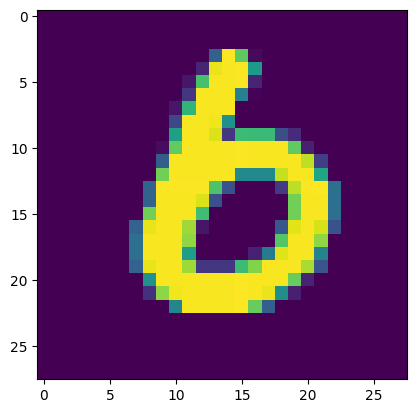

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[15057,1:].values.reshape(28,28))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [ ]:
z=df.iloc[0:8400,0]

In [ ]:
z.values

array([1, 0, 1, ..., 6, 4, 5])

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.shape

(33600,)

In [ ]:
x_test.shape

(8400, 784)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_test)
x_test=scaler.transform(x_test)



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
x_train_trf_1=pca.fit_transform(x_train)
x_test_trf_1=pca.fit_transform(x_test)

In [ ]:
x_train_trf_1.shape

(8400, 2)

In [ ]:
x_train_trf_1= pd.DataFrame(x_train_trf_1)

In [ ]:
x_train_trf_1.head()

,0,1
0,-5.041784,-2.441916
1,-7.742447,-1.241653
2,-7.638935,1.594658
3,-4.204979,5.928886
4,-3.657349,-5.136128


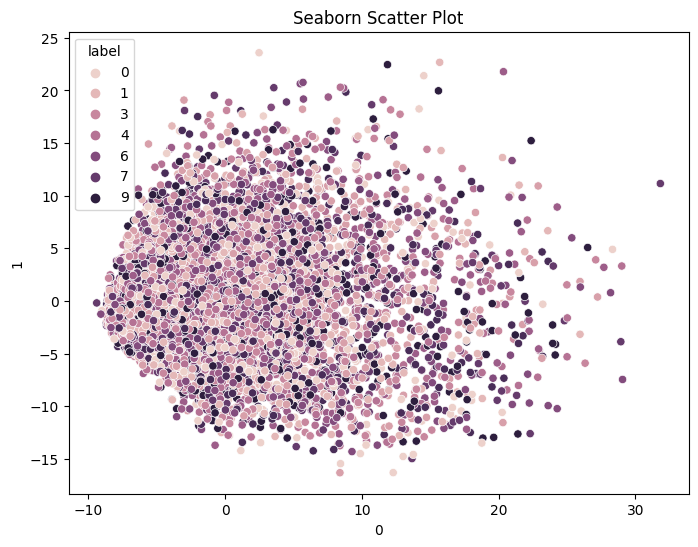

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_train_trf_1[0], y=x_train_trf_1[1], hue=df['label'])
plt.title("Seaborn Scatter Plot")
plt.show()

In [ ]:
import plotly.express as px

y_train = y_train[:len(x_train_trf_1)]  # ✅ Ensure lengths match

fig = px.scatter(
    x=x_train_trf_1.iloc[:, 0],
    y=x_train_trf_1.iloc[:, 1],
    color=y_train,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [ ]:
x_train_trf_2=pca.fit_transform(x_train)
x_test_trf_2=pca.fit_transform(x_test)

In [ ]:
x_train_trf_2.shape

(8400, 3)

In [ ]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=x_train_trf_2[:,0],y=x_train_trf_2[:,1],z=x_train_trf_2[:,2],color=y_train_trf)
fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [ ]:
pca.explained_variance_

array([40.87278367, 28.96627736, 27.04279923])

In [ ]:
pca.components_

array([[-4.46608378e-17,  9.64943155e-18,  1.73989619e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.19323324e-16,  1.54549626e-17,  2.01768102e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.49792336e-16,  9.11248980e-17, -6.37154786e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
pca.components_.shape

(3, 784)

In [ ]:
pca.explained_variance_ratio_

array([0.06054506, 0.04290789, 0.04005864])

In [ ]:
pca = PCA(n_components=None)
x_train_trf_2=pca.fit_transform(x_train)
x_test_trf_2=pca.fit_transform(x_test)

In [ ]:
pca.explained_variance_

array([4.08727837e+01, 2.89662802e+01, 2.70428004e+01, 2.06867883e+01,
       1.80302201e+01, 1.55676934e+01, 1.37180098e+01, 1.28553924e+01,
       1.13029032e+01, 1.01403309e+01, 9.76923285e+00, 8.82905522e+00,
       8.06129222e+00, 7.88488106e+00, 7.60700430e+00, 7.23557782e+00,
       6.82238306e+00, 6.81508304e+00, 6.48782951e+00, 6.39913136e+00,
       6.13346182e+00, 5.76252759e+00, 5.57609776e+00, 5.44995438e+00,
       5.31119167e+00, 5.15527872e+00, 5.01762185e+00, 4.81398782e+00,
       4.73591504e+00, 4.55311172e+00, 4.51920555e+00, 4.40149789e+00,
       4.31668874e+00, 4.12026063e+00, 4.06446124e+00, 4.00045930e+00,
       3.97224384e+00, 3.87458959e+00, 3.79601430e+00, 3.64675229e+00,
       3.56504324e+00, 3.53165189e+00, 3.45701947e+00, 3.40722064e+00,
       3.28821058e+00, 3.22294318e+00, 3.16606194e+00, 3.16025957e+00,
       3.10742422e+00, 3.07025285e+00, 3.01596603e+00, 2.99267737e+00,
       2.94736841e+00, 2.88525956e+00, 2.83528784e+00, 2.80254246e+00,
      

In [ ]:
pca.explained_variance_.shape

(784,)

In [ ]:
pca.components_.shape

(784, 784)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06054506, 0.10345296, 0.1435116 , 0.17415505, 0.2008633 ,
       0.22392381, 0.24424437, 0.26328712, 0.28003017, 0.2950511 ,
       0.30952231, 0.32260084, 0.33454207, 0.34622198, 0.35749028,
       0.36820838, 0.37831441, 0.38840962, 0.39802008, 0.40749915,
       0.41658467, 0.42512074, 0.43338064, 0.44145368, 0.44932118,
       0.45695772, 0.46439035, 0.47152133, 0.47853667, 0.48528122,
       0.49197554, 0.4984955 , 0.50488983, 0.5109932 , 0.5170139 ,
       0.5229398 , 0.52882391, 0.53456336, 0.54018641, 0.54558837,
       0.55086928, 0.55610074, 0.56122164, 0.56626877, 0.57113961,
       0.57591378, 0.58060368, 0.58528499, 0.58988803, 0.59443601,
       0.59890358, 0.60333665, 0.6077026 , 0.61197655, 0.61617648,
       0.6203279 , 0.6243674 , 0.62836904, 0.632244  , 0.63608538,
       0.63988348, 0.64363517, 0.64732886, 0.65099829, 0.65461534,
       0.65818137, 0.66169008, 0.66515602, 0.66856668, 0.67192998,
       0.67525401, 0.67855196, 0.68178585, 0.68499317, 0.68817

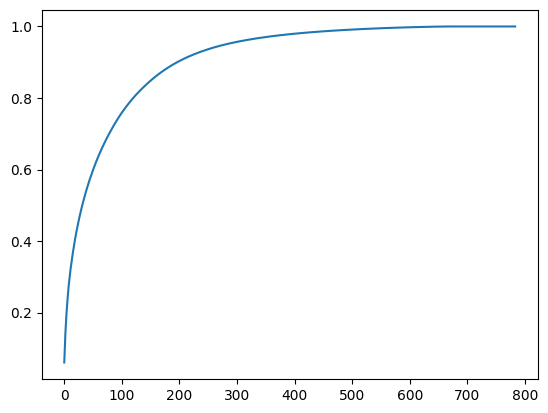

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))